In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data=pd.read_csv("F:\\data_science\\diabetes_dataset\\diabetes.csv")
train_data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
train_data.shape

(768, 9)

In [5]:
train_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
import seaborn as sns

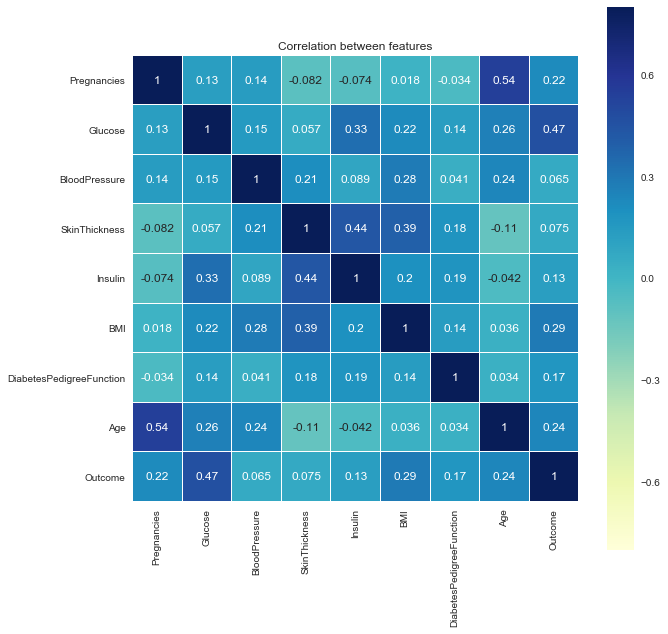

In [7]:
corr=train_data.corr()
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

In [8]:
from sklearn.metrics import roc_auc_score

In [9]:
independent_variables=[x for x in train_data.columns if x not in ['Outcome']]

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test=train_test_split(train_data[independent_variables], train_data['Outcome'], test_size=0.25, random_state = 0)

In [12]:
from sklearn.metrics import make_scorer

In [13]:
my_scorer=make_scorer(roc_auc_score,greater_is_better=True)

### Logistic regression

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
lm=LogisticRegression(random_state=0)
params={'C':[0.001,0.1,1,10,100]}

In [17]:
g_cv=GridSearchCV(lm,param_grid=params,scoring=my_scorer,cv=5)

In [18]:
g_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True,
       scoring=make_scorer(roc_auc_score), verbose=0)

In [19]:
g_cv.best_estimator_,g_cv.best_score_,g_cv.best_params_

(LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False), 0.71692770187434818, {'C': 10})

In [20]:
lm_best=g_cv.best_estimator_
lm_best.fit(X_train,y_train)
print('training score:'+str(roc_auc_score(y_train,lm_best.predict(X_train))))
print('test score:'+str(roc_auc_score(y_test,lm_best.predict(X_test))))

training score:0.722894253477
test score:0.75223325062


In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
confusion_matrix(y_test,lm_best.predict(X_test))

array([[118,  12],
       [ 25,  37]])

#### fbeta score

In [24]:
from sklearn.metrics import fbeta_score
fbeta_scorer=make_scorer(fbeta_score,greater_is_better=True,beta=2)

In [29]:
lm=LogisticRegression(random_state=0)
g_cv=GridSearchCV(lm,param_grid=params,scoring=fbeta_scorer,cv=5)

In [30]:
g_cv.fit(X_train,y_train)
g_cv.best_score_

0.58617985404186235

In [31]:
g_cv.cv_results_

{'mean_fit_time': array([ 0.00478034,  0.00719919,  0.00719991,  0.00865097,  0.01249933]),
 'mean_score_time': array([ 0.00080037,  0.00240054,  0.00320005,  0.00159969,  0.        ]),
 'mean_test_score': array([ 0.28190607,  0.42996483,  0.57346572,  0.58604426,  0.58617985]),
 'mean_train_score': array([ 0.3152858 ,  0.43814514,  0.57298575,  0.60207987,  0.60161935]),
 'param_C': masked_array(data = [0.001 0.1 1 10 100],
              mask = [False False False False False],
        fill_value = ?),
 'params': ({'C': 0.001}, {'C': 0.1}, {'C': 1}, {'C': 10}, {'C': 100}),
 'rank_test_score': array([5, 4, 3, 2, 1]),
 'split0_test_score': array([ 0.29255319,  0.36842105,  0.52083333,  0.4973822 ,  0.49479167]),
 'split0_train_score': array([ 0.29331514,  0.44312169,  0.58035714,  0.59974747,  0.59974747]),
 'split1_test_score': array([ 0.36842105,  0.51020408,  0.68292683,  0.66502463,  0.66831683]),
 'split1_train_score': array([ 0.33875339,  0.42819499,  0.5648267 ,  0.58860759,  0.58

In [35]:
lm_best=g_cv.best_estimator_
lm_best.fit(X_train,y_train)
print('training score:'+str(fbeta_score(y_train,lm_best.predict(X_train),beta=2)))
print('test score:'+str(fbeta_score(y_test,lm_best.predict(X_test),beta=2)))

training score:0.600403632694
test score:0.608108108108


In [34]:
confusion_matrix(y_test,lm_best.predict(X_test))

array([[118,  12],
       [ 26,  36]])

In [36]:
lm1=LogisticRegression(C=1000)
lm1.fit(X_train,y_train)
print('training score:'+str(fbeta_score(y_train,lm_best.predict(X_train),beta=2)))
print('test score:'+str(fbeta_score(y_test,lm_best.predict(X_test),beta=2)))

training score:0.600403632694
test score:0.608108108108


### K-nearest neighbours

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
params={'n_neighbors':[1,2,4,7,10]}
knn=KNeighborsClassifier()
g_cv=GridSearchCV(knn,param_grid=params,cv=5,scoring=my_scorer)

In [42]:
g_cv.fit(X_train,y_train)
g_cv.cv_results_

{'mean_fit_time': array([ 0.02820764,  0.00160022,  0.        ,  0.00312519,  0.        ]),
 'mean_score_time': array([ 0.00320044,  0.00240002,  0.00159903,  0.00312195,  0.00312514]),
 'mean_test_score': array([ 0.65714191,  0.61283508,  0.63334575,  0.69400112,  0.65839698]),
 'mean_train_score': array([ 1.        ,  0.76760532,  0.72812494,  0.74554234,  0.7174161 ]),
 'param_n_neighbors': masked_array(data = [1 2 4 7 10],
              mask = [False False False False False],
        fill_value = ?),
 'params': ({'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 4},
  {'n_neighbors': 7},
  {'n_neighbors': 10}),
 'rank_test_score': array([3, 5, 4, 1, 2]),
 'split0_test_score': array([ 0.63674389,  0.58011583,  0.5971686 ,  0.65508366,  0.61422136]),
 'split0_train_score': array([ 1.        ,  0.77439024,  0.74192485,  0.73796968,  0.73146012]),
 'split1_test_score': array([ 0.74291365,  0.65194463,  0.6872116 ,  0.72923533,  0.67501648]),
 'split1_train_score': array([ 1.  

In [43]:
g_cv.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [45]:
knn_best=g_cv.best_estimator_
knn_best.fit(X_train,y_train)
print('traning score:'+str(roc_auc_score(y_train,knn_best.predict(X_train))))
print('test_score:'+str(roc_auc_score(y_test,knn_best.predict(X_test))))

traning score:0.74123589609
test_score:0.709181141439


In [47]:
confusion_matrix(y_test,knn_best.predict(X_test))

array([[111,  19],
       [ 27,  35]])

#### fbeta score

In [46]:
knn=KNeighborsClassifier()
g_cv=GridSearchCV(knn,param_grid=params,cv=5,scoring=fbeta_scorer)

In [48]:
g_cv.fit(X_train,y_train)
g_cv.cv_results_

{'mean_fit_time': array([ 0.00312386,  0.00472584,  0.00320058,  0.00160065,  0.00240035]),
 'mean_score_time': array([ 0.00625105,  0.00552478,  0.00240011,  0.00240021,  0.00240088]),
 'mean_test_score': array([ 0.56219454,  0.35927289,  0.42338348,  0.55766548,  0.45960846]),
 'mean_train_score': array([ 1.        ,  0.59003786,  0.54496985,  0.63486579,  0.55664555]),
 'param_n_neighbors': masked_array(data = [1 2 4 7 10],
              mask = [False False False False False],
        fill_value = ?),
 'params': ({'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 4},
  {'n_neighbors': 7},
  {'n_neighbors': 10}),
 'rank_test_score': array([1, 5, 4, 2, 3]),
 'split0_test_score': array([ 0.49261084,  0.24861878,  0.29891304,  0.44270833,  0.34759358]),
 'split0_train_score': array([ 1.        ,  0.60321716,  0.57029178,  0.62025316,  0.57011796]),
 'split1_test_score': array([ 0.72093023,  0.46875   ,  0.55555556,  0.64039409,  0.53299492]),
 'split1_train_score': array([ 1.  

In [49]:
knn_best=g_cv.best_estimator_
knn_best.fit(X_train,y_train)
print('traning score:'+str(fbeta_score(y_train,knn_best.predict(X_train),beta=2)))
print('test_score:'+str(fbeta_score(y_test,knn_best.predict(X_test),beta=2)))

traning score:1.0
test_score:0.418006430868


In [50]:
confusion_matrix(y_test,knn_best.predict(X_test))

array([[93, 37],
       [36, 26]])

In [52]:
confusion_matrix(y_train,knn_best.predict(X_train))

array([[370,   0],
       [  0, 206]])

### support vector machine

In [51]:
from sklearn.svm import SVC

In [ ]:
def fit_g_cv(estimator,params,X_train,y_train,scorer=None):
    g_cv=GridSearchCV(estimator,param_grid=params,scoring=scorer,cv=5)
    g_cv.fit(X_train,y_train)
    fig,ax=plt.subplots(figsize=(9,7))
    ax.plot()

In [60]:
sv_model=SVC(kernel='rbf',random_state=0)
params={'C':[0.01,0.1,1,10],'gamma':[0.0001,0.0002,0.0003,'auto']}
g_cv=GridSearchCV(sv_model,param_grid=params,cv=5,scoring=my_scorer)

In [61]:
g_cv.fit(X_train,y_train)
g_cv.cv_results_

{'mean_fit_time': array([ 0.00624995,  0.00987663,  0.0097753 ,  0.02116666,  0.008605  ,
         0.00890603,  0.00880604,  0.02291927,  0.00820513,  0.0089057 ,
         0.00920568,  0.02351646,  0.01030698,  0.01160803,  0.01200151,
         0.03148508]),
 'mean_score_time': array([ 0.00947928,  0.        ,  0.00312476,  0.00420361,  0.00210252,
         0.00210209,  0.0023026 ,  0.00520372,  0.00210276,  0.00200253,
         0.00210285,  0.00530682,  0.00210547,  0.00199609,  0.00160494,
         0.00522995]),
 'mean_test_score': array([ 0.5       ,  0.5       ,  0.5       ,  0.5       ,  0.5910194 ,
         0.60666489,  0.58641304,  0.5       ,  0.69026132,  0.6899981 ,
         0.68465111,  0.5       ,  0.6832275 ,  0.66726747,  0.6734955 ,
         0.5       ]),
 'mean_train_score': array([ 0.5       ,  0.5       ,  0.5       ,  0.5       ,  0.60429446,
         0.62632234,  0.60321048,  0.5       ,  0.70945661,  0.72011596,
         0.7324571 ,  1.        ,  0.75256367,  0.789

In [62]:
g_cv.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [63]:
svm_best=g_cv.best_estimator_
svm_best.fit(X_train,y_train)
print('training score:'+str(roc_auc_score(y_train,svm_best.predict(X_train))))
print('test score:'+str(roc_auc_score(y_test,svm_best.predict(X_test))))

training score:0.698924166885
test score:0.72382133995


In [64]:
confusion_matrix(y_test,svm_best.predict(X_test))

array([[119,  11],
       [ 29,  33]])

#### fbeta score

In [65]:
svm_model=SVC(kernel='rbf',random_state=0)
g_cv=GridSearchCV(sv_model,param_grid=params,cv=5,scoring=fbeta_scorer)

In [66]:
g_cv.fit(X_train,y_train)
g_cv.cv_results_

C:\Users\user\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\Anaconda2\envs\py35\lib\site-packages\skle

{'mean_fit_time': array([ 0.01380253,  0.00635033,  0.00937557,  0.0256825 ,  0.00947037,
         0.01371017,  0.0062499 ,  0.02136092,  0.01270261,  0.00735464,
         0.01289883,  0.02538099,  0.01101274,  0.01170783,  0.01180477,
         0.02661786]),
 'mean_score_time': array([ 0.00755224,  0.00312586,  0.00675302,  0.00627885,  0.00312867,
         0.00322433,  0.00675616,  0.00625081,  0.00362558,  0.        ,
         0.00665169,  0.00110106,  0.00230269,  0.00220494,  0.00240231,
         0.00550475]),
 'mean_test_score': array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.24405815,
         0.28170839,  0.22840678,  0.        ,  0.51704922,  0.51996986,
         0.51685712,  0.        ,  0.51693081,  0.50758057,  0.53245874,  0.        ]),
 'mean_train_score': array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.27150568,
         0.32314099,  0.2679422 ,  0.        ,  0.54261836,  0.5624594 ,
         0.58279322,  1.        ,  0.61923208,  0.67952078,  

### Adaptive boosting

In [67]:
from sklearn.ensemble import AdaBoostClassifier

In [76]:
adam=AdaBoostClassifier(random_state=0)
params={'n_estimators':[20,30,40,50],'learning_rate':[0.01,1,2]}
g_cv=GridSearchCV(adam,param_grid=params,cv=5,scoring=fbeta_scorer)

In [77]:
g_cv.fit(X_train,y_train)
g_cv.cv_results_

C:\Users\user\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


{'mean_fit_time': array([ 0.04193621,  0.0696393 ,  0.08337274,  0.13447881,  0.04132915,
         0.07585707,  0.08569345,  0.10247254,  0.04143248,  0.07344551,
         0.0933322 ,  0.1086411 ]),
 'mean_score_time': array([ 0.00675921,  0.00957704,  0.00581026,  0.01185412,  0.00340247,
         0.00765443,  0.00330224,  0.0068047 ,  0.00350251,  0.00449958,
         0.01165924,  0.00642734]),
 'mean_test_score': array([ 0.48726333,  0.48726333,  0.48177788,  0.46841062,  0.60310766,
         0.58538387,  0.58180248,  0.55349936,  0.32613231,  0.32613231,
         0.32613231,  0.25961587]),
 'mean_train_score': array([ 0.53562723,  0.53562723,  0.52306531,  0.51905257,  0.69188821,
         0.71595319,  0.72401601,  0.72864134,  0.31499811,  0.31499811,
         0.31499811,  0.2560434 ]),
 'param_learning_rate': masked_array(data = [0.01 0.01 0.01 0.01 1 1 1 1 2 2 2 2],
              mask = [False False False False False False False False False False False False],
        fill_value

In [78]:
g_cv.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
          n_estimators=20, random_state=0)

In [75]:
g_cv.best_score_

0.58538387200746234

### Decision tree classifier

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
dtm=DecisionTreeClassifier(random_state=0)
params={'max_depth':[2,4,6,8,10]}
g_cv=GridSearchCV(dtm,param_grid=params,cv=5,scoring=fbeta_scorer)

In [82]:
g_cv.fit(X_train,y_train)
g_cv.cv_results_

{'mean_fit_time': array([ 0.0063518 ,  0.003125  ,  0.00665097,  0.0064517 ,  0.0062501 ]),
 'mean_score_time': array([ 0.0004003 ,  0.        ,  0.00020018,  0.        ,  0.        ]),
 'mean_test_score': array([ 0.48856556,  0.59540388,  0.50563803,  0.53082876,  0.54098354]),
 'mean_train_score': array([ 0.56168665,  0.71383738,  0.77120823,  0.89946104,  0.95644384]),
 'param_max_depth': masked_array(data = [2 4 6 8 10],
              mask = [False False False False False],
        fill_value = ?),
 'params': ({'max_depth': 2},
  {'max_depth': 4},
  {'max_depth': 6},
  {'max_depth': 8},
  {'max_depth': 10}),
 'rank_test_score': array([5, 1, 4, 3, 2]),
 'split0_test_score': array([ 0.17142857,  0.6372549 ,  0.36649215,  0.425     ,  0.48780488]),
 'split0_train_score': array([ 0.42068966,  0.75301205,  0.67232376,  0.84480601,  0.91925466]),
 'split1_test_score': array([ 0.54123711,  0.63414634,  0.55      ,  0.58252427,  0.56097561]),
 'split1_train_score': array([ 0.49277267,  0.6

In [83]:
dtm_best=g_cv.best_estimator_
dtm_best.fit(X_train,y_train)
print('training score:'+str(fbeta_score(y_train,dtm_best.predict(X_train),beta=2)))
print('test score:'+str(fbeta_score(y_test,dtm_best.predict(X_test),beta=2)))

training score:0.717703349282
test score:0.598705501618


In [84]:
confusion_matrix(y_test,dtm_best.predict(X_test))

array([[106,  24],
       [ 25,  37]])